In [5]:
import numpy as np
import pandas as pd
import glob 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pub = pd.DataFrame()
for file in glob.glob("*.csv"):
    df = pd.read_csv(file)
    df = df[df["App/URL"].isnull() == False]
    pub = pub.append(df, ignore_index=True)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#setting exchange rate
#GBP > USD:
GBPtoUSD = 1.3
#GBPtoEUR:
GBPtoEUR = 1.17

In [8]:
pub = pub.drop(['Advertiser ID', 'Advertiser Status', 'Advertiser Integration Code', 'App/URL ID'], 1)

In [9]:
pub.columns = ['Month', 'Advertiser', 'URL', 'PublicInventory', 'Currency', 'Impressions', 'Clicks', 'Spend']
pub.Advertiser = pub.Advertiser.astype("category")

In [10]:
pub.loc[pub.Currency == "USD", "cSpend"] = pub.Spend / GBPtoUSD
pub.loc[pub.Currency == "EUR", "cSpend"] = pub.Spend / GBPtoEUR
pub.loc[pub.Currency == "GBP", "cSpend"] = pub.Spend

In [11]:
pub["AdvertiserNameX"] = pub.Advertiser.str.split("_").str[0]
pub["AdvertiserName"] = pub.AdvertiserNameX.str.lower()
pal = sns.color_palette(["#00afef"], 1)

In [12]:
pub["cURL"] = pub.URL.str.split(".").str[0]

In [90]:
pub_p = pd.DataFrame(pub.pivot_table(values=["cSpend", "Impressions"], index="cURL", aggfunc=np.sum))

In [96]:
pub_p_100 = pub_p.sort_values("cSpend" ,ascending=False).head(100)

In [103]:
pub_p_100["CPM"] = pub_p_100.cSpend / pub_p_100.Impressions * 1000

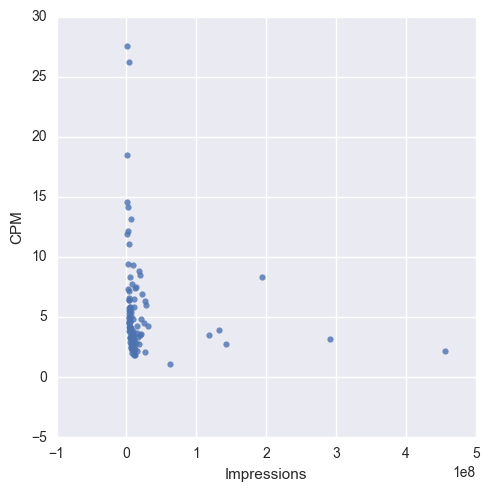

In [112]:
sns.lmplot(data = pub_p_100, x="Impressions", y= "CPM", fit_reg=False)

In [ ]:
sns.lmplot(data = pub_p_100, x="cSpend", y= "Impressions", fit_reg=False)

[]

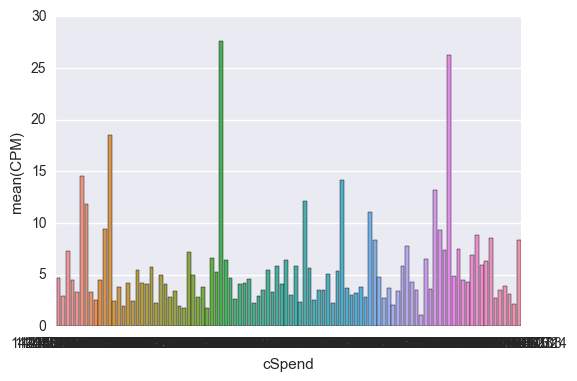

In [129]:
f, ax1=plt.subplots(1,1)
sns.barplot(data = pub_p_100, x="cSpend", y= "CPM", ax=ax1)
plt.plot(x=np.arange(np.min(pub_p_100.cSpend), np.max(pub_p_100.cSpend)), y=15)

[]

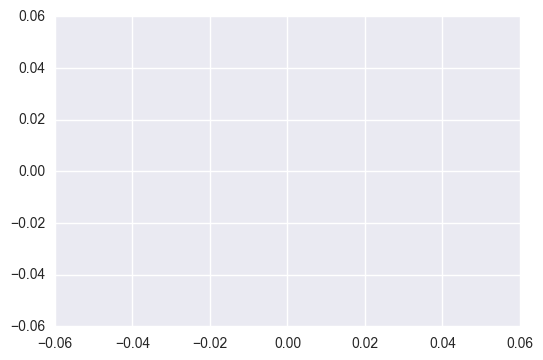

In [131]:
plt.plot(x=np.arange(np.min(pub_p_100.cSpend), np.max(pub_p_100.cSpend)), y=15, color="Blues")